In [ ]:
!git clone https://github.com/salesforce/Merlion.git

Cloning into 'Merlion'...
remote: Enumerating objects: 726, done.
remote: Counting objects: 100% (586/586), done.
remote: Compressing objects: 100% (357/357), done.
remote: Total 726 (delta 325), reused 401 (delta 229), pack-reused 140
Receiving objects: 100% (726/726), 77.92 MiB | 38.16 MiB/s, done.
Resolving deltas: 100% (334/334), done.


In [ ]:
pip install .

Processing /content/Merlion
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for salesforce-merlion: filename=salesforce_merlion-1.0.0-py3-none-any.whl size=615156 sha256=c0ccfc91c5aa678f8ee8198977d82814297a1b920050083a348239f77dc607f2
  Stored in directory: /tmp/pip-ephem-wheel-cache-yhfe4w7s/wheels/44/c3/ce/cc5e7a0c851b4c50b0e1cead0de429bcfb4742b8da7032052a
Successfully built salesforce-merlion
  Attempting uninstall: salesforce-merlion
    Found existing installation: salesforce-merlion 1.0.0
    Uninstalling salesforce-merlion-1.0.0:
      Successfully uninstalled salesforce-merlion-1.0.0


In [ ]:
%cd /content/Merlion

/content/Merlion


In [ ]:
pip install -e ts_datasets/

Obtaining file:///content/Merlion/ts_datasets
  Running setup.py develop for ts-datasets


In [ ]:
import pandas as pd

### Anomaly detection

In [ ]:
from merlion.utils import TimeSeries
from ts_datasets.anomaly import NAB

time_series, metadata = NAB(subset='realTweets')[5]
train_data = TimeSeries.from_pd(time_series[metadata.trainval])
test_data = TimeSeries.from_pd(time_series[~metadata.trainval])
test_labels = TimeSeries.from_pd(metadata.anomaly[~metadata.trainval])

In [ ]:
time_series.head(6)

,value
timestamp,
2015-02-26 21:42:53,35
2015-02-26 21:47:53,41
2015-02-26 21:52:53,32
2015-02-26 21:57:53,36
2015-02-26 22:02:53,32
2015-02-26 22:07:53,25


In [ ]:
train_data

                     value
2015-02-26 21:42:53   35.0
2015-02-26 21:47:53   41.0
2015-02-26 21:52:53   32.0
2015-02-26 21:57:53   36.0
2015-02-26 22:02:53   32.0
...                    ...
2015-03-07 03:22:53   10.0
2015-03-07 03:27:53    9.0
2015-03-07 03:32:53    5.0
2015-03-07 03:37:53    4.0
2015-03-07 03:42:53    9.0

[2377 rows x 1 columns]

In [ ]:
test_data

                     value
2015-03-07 03:47:53   12.0
2015-03-07 03:52:53   13.0
2015-03-07 03:57:53   13.0
2015-03-07 04:02:53    6.0
2015-03-07 04:07:53   25.0
...                    ...
2015-04-22 21:27:53   58.0
2015-04-22 21:32:53   50.0
2015-04-22 21:37:53   32.0
2015-04-22 21:42:53   72.0
2015-04-22 21:47:53   72.0

[13465 rows x 1 columns]

In [ ]:
test_labels

                     anomaly
2015-03-07 03:47:53      0.0
2015-03-07 03:52:53      0.0
2015-03-07 03:57:53      0.0
2015-03-07 04:02:53      0.0
2015-03-07 04:07:53      0.0
...                      ...
2015-04-22 21:27:53      0.0
2015-04-22 21:32:53      0.0
2015-04-22 21:37:53      0.0
2015-04-22 21:42:53      0.0
2015-04-22 21:47:53      0.0

[13465 rows x 1 columns]

In [ ]:
from merlion.models.defaults import DefaultDetectorConfig, DefaultDetector
# initialize,train, and test the detector
model = DefaultDetector(DefaultDetectorConfig())
model.train(train_data=train_data)
test_pred = model.get_anomaly_label(time_series=test_data)

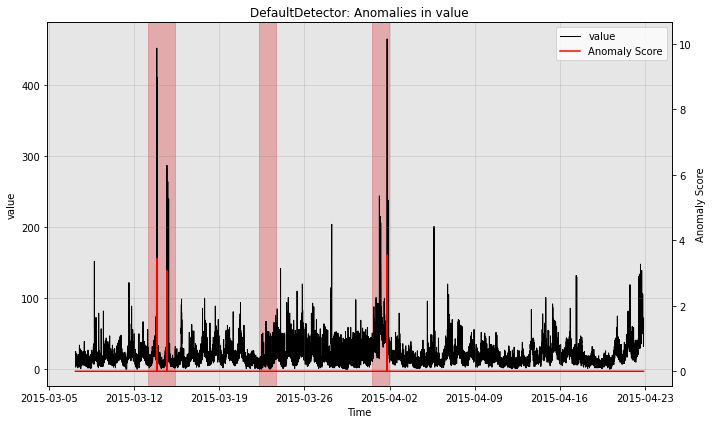

In [ ]:
from merlion.plot import plot_anoms
import matplotlib.pyplot as plt
fig, ax = model.plot_anomaly(time_series=test_data)
plot_anoms(ax=ax, anomaly_labels=test_labels)
plt.show()

In [ ]:
from merlion.evaluate.anomaly import TSADMetric
#Precision Score
p = TSADMetric.Precision.value(ground_truth=test_labels, predict=test_pred)
# Recall Score
r = TSADMetric.Recall.value(ground_truth=test_labels, predict=test_pred)
# F1 Score
f1 = TSADMetric.F1.value(ground_truth=test_labels, predict=test_pred)
# returns mean time taken to detect anomaly
mttd = TSADMetric.MeanTimeToDetect.value(ground_truth=test_labels, predict=test_pred)
print(f"Precision: {p:.4f}, Recall: {r:.4f}, F1: {f1:.4f}\n"
      f"Mean Time To Detect: {mttd}")

Precision: 1.0000, Recall: 0.6667, F1: 0.8000
Mean Time To Detect: 0 days 23:22:30


### Forecasting

In [ ]:
import pandas as pd


In [ ]:
from ts_datasets.forecast import M4

time_series, metadata = M4(subset="Daily")[0]
train_data = TimeSeries.from_pd(time_series[metadata.trainval])
test_data = TimeSeries.from_pd(time_series[~metadata.trainval])

100%|██████████| 4227/4227 [00:15<00:00, 269.37it/s]


In [ ]:
time_series

,D1
1970-01-01,1017.1
1970-01-02,1019.3
1970-01-03,1017.0
1970-01-04,1019.2
1970-01-05,1018.7
...,...
1972-10-12,2066.4
1972-10-13,2067.4
1972-10-14,2071.4
1972-10-15,2083.8


In [ ]:
metadata

,trainval
1970-01-01,True
1970-01-02,True
1970-01-03,True
1970-01-04,True
1970-01-05,True
...,...
1972-10-12,False
1972-10-13,False
1972-10-14,False
1972-10-15,False


In [ ]:
train_data

                D1
1970-01-01  1017.1
1970-01-02  1019.3
1970-01-03  1017.0
1970-01-04  1019.2
1970-01-05  1018.7
...            ...
1972-09-28  2015.6
1972-09-29  2009.7
1972-09-30  2022.1
1972-10-01  2031.6
1972-10-02  2029.7

[1006 rows x 1 columns]

In [ ]:
test_data

                D1
1972-10-03  2039.2
1972-10-04  2035.0
1972-10-05  2051.8
1972-10-06  2061.8
1972-10-07  2063.5
1972-10-08  2069.5
1972-10-09  2054.0
1972-10-10  2057.0
1972-10-11  2062.8
1972-10-12  2066.4
1972-10-13  2067.4
1972-10-14  2071.4
1972-10-15  2083.8
1972-10-16  2080.6

In [ ]:
from merlion.models.defaults import DefaultForecasterConfig, DefaultForecaster
model = DefaultForecaster(DefaultForecasterConfig())
model.train(train_data=train_data)
test_pred, test_err = model.forecast(time_stamps=test_data.time_stamps)

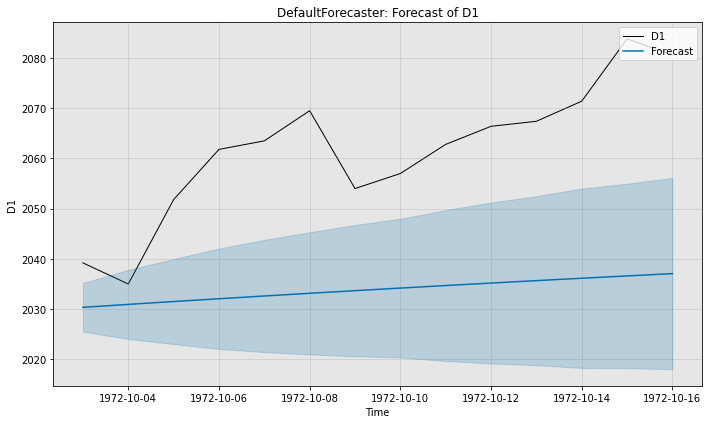

In [ ]:
import matplotlib.pyplot as plt
fig, ax = model.plot_forecast(time_series=test_data, plot_forecast_uncertainty=True)
plt.show()

In [ ]:
from scipy.stats import norm
from merlion.evaluate.forecast import ForecastMetric

# Compute the sMAPE of the predictions (0 to 100, smaller is better)
smape = ForecastMetric.sMAPE.value(ground_truth=test_data, predict=test_pred)

# Compute the MSIS of the model's 95% confidence interval (0 to 100, smaller is better)
lb = TimeSeries.from_pd(test_pred.to_pd() + norm.ppf(0.025) * test_err.to_pd().values)
ub = TimeSeries.from_pd(test_pred.to_pd() + norm.ppf(0.975) * test_err.to_pd().values)
msis = ForecastMetric.MSIS.value(ground_truth=test_data, predict=test_pred,
                                 insample=train_data, lb=lb, ub=ub)
print(f"sMAPE: {smape:.4f}, MSIS: {msis:.4f}")

sMAPE: 1.3596, MSIS: 17.9410
